# Disciplina: Pesquisa Operacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 5: Análise pós-ótima ** <br/>

A análise pós-ótima ou análise de sensibilidade permite que os parâmetros do modelo podem mudar dentro de certos limites sem provocar alterações na solução ótima. Utilizaremos a análise gráfica para entender como essa análise funciona.


**1. Sensibilidade da solução ótima às variações na disponbilidade dos recursos** 

Uma determinada empresa produz dois produtos em duas máquinas. Uma unidade do produto A requer duas horas da máquina 1 e 1 hora da máquina 2. Já o produto B requer 1 hora da máquina 1 e 3 horas da máquina 2. O lucro por unidade são R\$30,00 e R\$20,00, respectivamente.

Sendo $x_1$ o número diário de unidades do produto A e $x_2$ do produto B, modelo pode ser representado da seguinte maneira:

max $30x_1 + 20x_2$

s.a.

$2x_1 + x_2 \leq 8$

$x_1 + 3x_2 \leq 8$

$x_1, x_2 \geq 0$


Suponha que o administrador deseja ampliar a empresa e te contrate para definir em qual recurso ele deve investir para aumentar o lucro.

Observe a solução gráfica:


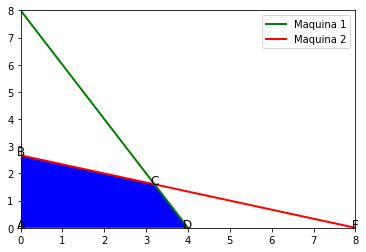

In [26]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

x1=[4, 0]
x2=[0, 8]


x3=[8, 0]
x4=[0, 8/3]

plt.figure()
axes = plt.gca()
plt.plot(x1, x2, 'g-', linewidth=2, markersize=1, label='Maquina 1')
plt.plot(x3,x4, 'r-',linewidth=2, markersize=1, label='Maquina 2')
plt.axis([0, 8, 0, 8])
plt.legend()
axes.add_patch(Polygon([(0, 0), (4, 0), (3.2, 1.6), (0, 8/3)],
                       closed=True, facecolor='blue'))

plt.text(0 , 0, "A",horizontalalignment='center', fontsize=12)
plt.text(0 , 8/3, "B",horizontalalignment='center', fontsize=12)
plt.text(3.2 , 1.6, "C",horizontalalignment='center', fontsize=12)
plt.text(4 , 0, "D",horizontalalignment='center', fontsize=12)
plt.text(8 , 0, "F",horizontalalignment='center', fontsize=12)


plt.show()

O lucro máximo é alcaçado no ponto C, em que $z = 128$

Façamos a seguinte alteração:

$2x_1 + x_2 \leq 9$



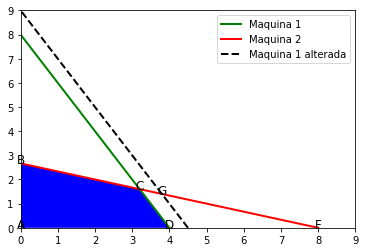

In [28]:
x1=[4, 0]
x2=[0, 8]


x3=[8, 0]
x4=[0, 8/3]

x11=[4.5, 0]
x22=[0, 9]

plt.figure()
axes = plt.gca()
plt.plot(x1, x2, 'g-', linewidth=2, markersize=1, label='Maquina 1')
plt.plot(x3,x4, 'r-',linewidth=2, markersize=1, label='Maquina 2')
plt.plot(x11, x22, 'k--', linewidth=2, markersize=1, label='Maquina 1 alterada')
plt.axis([0, 9, 0, 9])
plt.legend()
axes.add_patch(Polygon([(0, 0), (4, 0), (3.2, 1.6), (0, 8/3)],
                       closed=True, facecolor='blue'))

plt.text(0 , 0, "A",horizontalalignment='center', fontsize=12)
plt.text(0 , 8/3, "B",horizontalalignment='center', fontsize=12)
plt.text(3.2 , 1.6, "C",horizontalalignment='center', fontsize=12)
plt.text(4 , 0, "D",horizontalalignment='center', fontsize=12)
plt.text(3.8 , 1.4, "G",horizontalalignment='center', fontsize=12)
plt.text(8 , 0, "F",horizontalalignment='center', fontsize=12)


plt.show()

Se há alteração na capacidade da máquina 1, de 8 horas para 9 horas, a nova solução ótima ocorrerá no ponto G.

Qual foi a taxa de variação do lucro nesse caso? 

$z = 142$

$142-128 = 14$

Essa taxa representa o valor unitário equivalente de um recurso (em R\$/h). A literatura chama essa variação da função objetivo de solução dual.

Essa variação de 14 reais por hora aumentada (ou reduzida) é válida em qual circunstância? R. Para quaisquer valores que desloquem a restrição 1 paralelamente sobre a reta BF. 

A faixa de variação do lucro dual pode ser calculada da seguinte maneira:

Capacidade mínima de horas da máquina 1 \[em B = (0, 8/3)\] $=2*0 +8/3 $, ou seja, 2,67 horas

Capacidade máxima de horas da máquina 1 \[em B = (8, 0)\] $=2*8 +0 $, ou seja, 16 horas

**Decisões:** 

1. Qual o lucro dual para a capacidade da máquina 2?

2. Qual máquina deveria receber maior prioridade de investimento?



**Solução algébrica**


|       | |   | ||
|--|--| --| -- | --| --|
| | |30 | 20| 0|0| | linha da função objetivo - z |
|($c_j$) |   Var. básicas | $x_1$| $x_2$ | $s_1$| $s_2$ | lado direito ($b_j$)| $\frac{b_j}{a_{ij}}$|
|30 | $x_1$ | 1  | 0| 3 / 5 |-1 / 5 | 16/5| |
|20 | $x_2$ | 0  | 1| -1 / 5	 |2/5	| 8/5| |
| |z | 30 | 20 | **14**  | **2**   |128| | |
| |c-z | 0| 0| -14 | -2  || | |

**Faixas de viabilidade:**

$x_1 = 16/5 +3/5s_1 - 1/5s_2 \geq 0 $

$x_2 = 8/5 -1/5s_1 + 2/5s_2 \geq 0 $

Quais variações simultâneas que satisfaçam essas desigualdades manterão a solução viável. Para ilustrar o uso dessas condições, suponha que as horas da máquina 1 passe a ser 9, no máximo. Então temos:

$x_1 = 16/5 +3/5 (1) - 1/5 (0) = 3,8 $ **Verdadeiro**

$x_2 = 8/5 -1/5 (1) + 2/5 (0) = 1,4 $ **Verdadeiro**

Suponha que as horas da máquina 1 passe a ser 17, no máximo. Qual será o resultado?


Bibliografia:
    
    TAHA, Hamdy A. Pesquisa Operacional. 8a edição. Pearson, 2008.
    
    MOREIRA, Daniel A. Pesquisa Operacional. 2a edição revista e atualizada. Cengage Learning, 2010.